In [10]:
import Learn2_new as ln
ut = ln.ut # utilities
ef = ln.ef # ERA_Fields_New


# log to stdout
import logging
import sys
import os
logging.getLogger().level = logging.INFO
logging.getLogger().handlers = [logging.StreamHandler(sys.stdout)]

# set spacing of the indentation
ut.indentation_sep = '  '
import numpy as np
import general_purpose.cartopy_plots as cplt
import cartopy.crs as ccrs

In [11]:
X, Y, yp, lat, lon = ln.prepare_data(load_data_kwargs = {'fields': ['t2m'], 'dataset_years': 1000, 'year_list' : range(10)})
LON, LAT = np.meshgrid(lon,lat)
LON.shape, LAT.shape, X.shape

prepare_data:
  load_data:
    Opening field tas
    First valid path found in /local/gmiloshe/PLASIM/Data_Plasim/ANO_tas.nc
    monotonize_years:
    monotonize_years: completed in 0.5 s
    First valid path found in /local/gmiloshe/PLASIM/Data_Plasim_inter/CONTROL_lsmask.nc
    First valid path found in /local/gmiloshe/PLASIM/Data_Plasim_inter/CONTROL_gparea.nc
    select_years:
    select_years: completed in 0.1 s
    select_lonlat:
    select_lonlat: completed in 0.1 s
    First valid path found in /local/gmiloshe/PLASIM/Data_Plasim_inter/CONTROL_lsmask.nc
  load_data: completed in 3.0 s
  prepare_XY:
    return_threshold = False    
    make_XY:
      make_X:
      make_X: completed in 0.0 s
      assign_labels:
        A_weights = None
        compute_time_average:
          compute_area_integral:
          compute_area_integral: completed in 0.0 s
        compute_time_average: completed in 0.0 s
        threshold_new = None
      assign_labels: completed in 0.0 s
    make_XY: co

((22, 128), (22, 128), (770, 22, 128, 1))

We can inspect the temperature field (plot it)

norm = <matplotlib.colors.TwoSlopeNorm object at 0x7f426577af10>


<GeoAxesSubplot:>

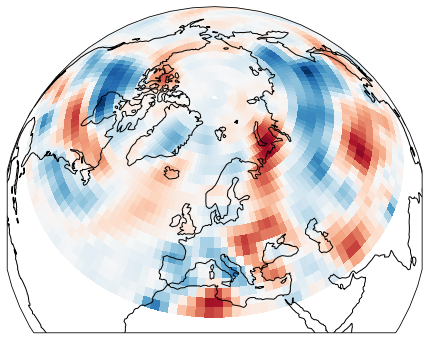

In [13]:
cplt.multiple_field_plot2(LON, LAT, X[0],
                         projections=[
                             ccrs.Orthographic(10, 55)
                         ],
                         fig_num=8,
                         put_colorbar=False,
                         extents=[None, None, (-5, 10, 39, 60)],
                         mode='pcolormesh',
                         draw_labels=False,
                         draw_gridlines=False,
                        )

In [164]:
(_, _, _, lat, lon), mask_France = ln.prepare_data_and_mask(load_data_kwargs = {'fields': ['t2m'], 'dataset_years': 1000, 'year_list' : range(10)})
LON, LAT = np.meshgrid(lon,lat)
(_, _, _, lat, lon), mask_Scandinavia = ln.prepare_data_and_mask(load_data_kwargs = {'fields': ['t2m'], 'area': 'Scandinavia', 'dataset_years': 1000, 'year_list' : range(10)})

mask = np.array(mask_France, dtype=np.float32)-np.array(mask_Scandinavia, dtype=np.float32)


prepare_data_and_mask:
  load_data:
    Opening field tas
    monotonize_years:
    monotonize_years: completed in 0.5 s
    select_years:
    select_years: completed in 0.1 s
    select_lonlat:
    select_lonlat: completed in 0.0 s
  load_data: completed in 1.7 s
  prepare_XY:
    return_threshold = False    
    make_XY:
      make_X:
      make_X: completed in 0.0 s
      assign_labels:
        A_weights = None
        compute_time_average:
        	compute_area_integral:
        	compute_area_integral: completed in 0.0 s
        compute_time_average: completed in 0.0 s
        threshold_new = None
      assign_labels: completed in 0.0 s
    make_XY: completed in 0.0 s
    roll_X:
    roll_X: completed in 0.0 s
    Mixing
    balance_folds:
      Balancing folds
      fold 0 done!
      fold 1 done!
      fold 2 done!
      fold 3 done!
      fold 4 done!
      fold 5 done!
      fold 6 done!
      fold 7 done!
      fold 8 done!
      fold 9 done!
      Sums of the balanced 10 fold

/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/Learn2_new.py:785: UserWarning: Fields will be filtered on a different area (France) than the region of interest (Scandinavia). If Scandinavia is not a subset of France the area integral will be different with and without filtering.
  warnings.warn(f'Fields will be filtered on a different area ({filter_area}) than the region of interest ({area}). If {area} is not a subset of {filter_area} the area integral will be different with and without filtering.')


    monotonize_years:
    monotonize_years: completed in 0.5 s
    select_years:
    select_years: completed in 0.1 s
    select_lonlat:
    select_lonlat: completed in 0.1 s
  load_data: completed in 1.6 s
  prepare_XY:
    return_threshold = False    
    make_XY:
      make_X:
      make_X: completed in 0.0 s
      assign_labels:
        A_weights = None
        compute_time_average:
        	compute_area_integral:
        	compute_area_integral: completed in 0.0 s
        compute_time_average: completed in 0.0 s
        threshold_new = None
      assign_labels: completed in 0.0 s
    make_XY: completed in 0.0 s
    roll_X:
    roll_X: completed in 0.0 s
    Mixing
    balance_folds:
      Balancing folds
      fold 0 done!
      fold 1 done!
      fold 2 done!
      fold 3 done!
      fold 4 done!
      fold 5 done!
      fold 6 done!
      fold 7 done!
      fold 8 done!
      fold 9 done!
      Sums of the balanced 10 folds:
      [23  6  6  3  0  0  0  0  0  0]
      std/avg = 1

In [166]:
config = ut.json2dict('../VAE/xforanalogs/ZGonlyNA24by48/Scandinavia/global_logit/yrs100/interT15/config.json')
lat_start = ut.extract_nested(config, 'lat_start')
lat_end = ut.extract_nested(config, 'lat_end')
lon_start = ut.extract_nested(config, 'lon_start')
lon_end = ut.extract_nested(config, 'lon_end')
(_, _, _, lat_NAE, lon_NAE), _ = ln.prepare_data_and_mask(load_data_kwargs = {'fields': ['t2m'], 'dataset_years': 1000, 'year_list' : range(10), 'lat_start' : lat_start, 'lat_end' : lat_end, 'lon_start' : lon_start, 'lon_end' : lon_end})
LON_NAE, LAT_NAE = np.meshgrid(lon_NAE,lat_NAE)

config = ut.json2dict('../VAE/xforanalogs/NH24by128/global_logit/yrs100/interT15/config.json')
lat_start = ut.extract_nested(config, 'lat_start')
lat_end = ut.extract_nested(config, 'lat_end')
lon_start = ut.extract_nested(config, 'lon_start')
lon_end = ut.extract_nested(config, 'lon_end')
(_, _, _, lat_NH, lon_NH), _ = ln.prepare_data_and_mask(load_data_kwargs = {'fields': ['t2m'], 'dataset_years': 1000, 'year_list' : range(10), 'lat_start' : lat_start, 'lat_end' : lat_end, 'lon_start' : lon_start, 'lon_end' : lon_end})
LON_NH, LAT_NH = np.meshgrid(lon_NH,lat_NH)

prepare_data_and_mask:
  load_data:
    Opening field tas
    monotonize_years:
    monotonize_years: completed in 0.6 s
    select_years:
    select_years: completed in 0.1 s
    select_lonlat:
    select_lonlat: completed in 0.0 s
  load_data: completed in 1.6 s
  prepare_XY:
    return_threshold = False    
    make_XY:
      make_X:
      make_X: completed in 0.0 s
      assign_labels:
        A_weights = None
        compute_time_average:
        	compute_area_integral:
        	compute_area_integral: completed in 0.0 s
        compute_time_average: completed in 0.0 s
        threshold_new = None
      assign_labels: completed in 0.0 s
    make_XY: completed in 0.0 s
    roll_X:
    roll_X: completed in 0.0 s
    Mixing
    balance_folds:
      Balancing folds
      fold 0 done!
      fold 1 done!
      fold 2 done!
      fold 3 done!
      fold 4 done!
      fold 5 done!
      fold 6 done!
      fold 7 done!
      fold 8 done!
      fold 9 done!
      Sums of the balanced 10 fold

In [167]:
imp.reload(cplt)

<module 'cartopy_plots' from '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/ERA/cartopy_plots.py'>

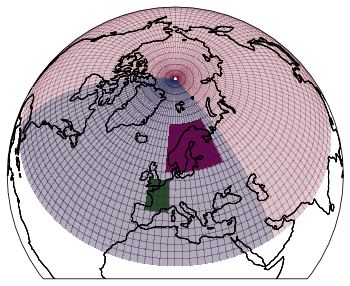

In [174]:
fig = plt.figure(figsize=(7,5))
m = cplt.multiple_field_plot2(LON, LAT, mask[...,np.newaxis],
                         projections=[
                             ccrs.Orthographic(10, 55)
                         ],
                         fig_num=8, figure=fig,
                         put_colorbar=False,
                         extents=[None, None, (-5, 10, 39, 60)],
                         mode='pcolormesh',
                         cmap='PiYG',
                         draw_labels=False,
                         draw_gridlines=False,
                        )
m = cplt.multiple_field_plot2(LON_NH, LAT_NH, 1*np.ones_like(LON_NH)[...,np.newaxis],
                         projections=[
                             ccrs.Orthographic(10, 55)
                         ],
                         fig_num=8, figure=fig, axes = m,
                         put_colorbar=False,
                         extents=[None, None, (-5, 10, 39, 60)],
                         mode='pcolormesh',
                         draw_labels=False,
                         draw_gridlines=False, alpha=0.2
                        )
m = cplt.multiple_field_plot2(LON_NAE, LAT_NAE, -1*np.ones_like(LON_NAE)[...,np.newaxis],
                         projections=[
                             ccrs.Orthographic(10, 55)
                         ],
                         fig_num=8, figure=fig, axes = m,
                         put_colorbar=False,
                         extents=[None, None, (-5, 10, 39, 60)],
                         mode='pcolormesh',
                         draw_labels=False,
                         draw_gridlines=False, alpha=0.2
                        )
fig.savefig('Images/areas.png', dpi=300)